In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd

In [2]:
doTrain=True
doLoadModel=True
doLoadMetrics=True
doPlotMetrics=True
doPredict=True
doLoadPredict=True
doCalculateMetrics2=True
doPlotMetrics2=True

modelName="ModelAdam001_min0_AllEvents"
numberOfEpochs=120
batchSize=50000

In [3]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [4]:
def p(name,nparray):
    print("Start",name)
    print(nparray)
    print("End",name,"shape",nparray.shape,"type",type(nparray),"dtype",nparray.dtype)
# done function

In [5]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/outputForOverlay"

In [6]:
#eventNumber="000000082"
eventNumber="all"
nparray_Input_Train=np.load(outputFolder+"/NN_2_data_Input_Train_"+eventNumber+".npy")
nparray_Input_Test=np.load(outputFolder+"/NN_2_data_Input_Test_"+eventNumber+".npy")
nparray_Output_Train=np.load(outputFolder+"/NN_2_data_Output_Train_"+eventNumber+".npy")
nparray_Output_Test=np.load(outputFolder+"/NN_2_data_Output_Test_"+eventNumber+".npy")

In [7]:
p("Input_Train",nparray_Input_Train)

Start Input_Train
[[[  -32.3306 ]
  [   -4.28872]
  [ -462.092  ]
  ...
  [  -89.3    ]
  [  -15.1782 ]
  [-1302.5    ]]

 [[  -30.0484 ]
  [  -10.8162 ]
  [ -427.981  ]
  ...
  [  -47.7968 ]
  [  -14.5214 ]
  [ -702.     ]]

 [[  -30.4775 ]
  [   -9.58902]
  [ -421.256  ]
  ...
  [ -112.212  ]
  [  -40.1146 ]
  [-1498.     ]]

 ...

 [[  -31.1126 ]
  [    6.67917]
  [  479.888  ]
  ...
  [  -52.7307 ]
  [   10.2438 ]
  [  817.5    ]]

 [[  -29.7171 ]
  [   10.754  ]
  [  423.404  ]
  ...
  [  -30.046  ]
  [   11.212  ]
  [  414.481  ]]

 [[  -31.1787 ]
  [    5.50642]
  [  468.062  ]
  ...
  [  -84.2942 ]
  [   15.5837 ]
  [ 1302.     ]]]
End Input_Train shape (676641, 60, 1) type <class 'numpy.ndarray'> dtype float64


In [8]:
p("Input_Test",nparray_Input_Test)

Start Input_Test
[[[-3.14083e+01]
  [-6.92671e+00]
  [-4.43949e+02]
  ...
  [-6.06544e+01]
  [-1.45361e+01]
  [-8.18000e+02]]

 [[-3.98043e+01]
  [-1.03018e+01]
  [-5.98000e+02]
  ...
  [-4.59755e+01]
  [-1.01379e+01]
  [-6.98000e+02]]

 [[-3.00415e+01]
  [-1.08359e+01]
  [-4.23476e+02]
  ...
  [-4.99527e+01]
  [-2.08473e+01]
  [-6.97500e+02]]

 ...

 [[-3.31662e+01]
  [-3.98620e-01]
  [ 4.46810e+02]
  ...
  [-7.94153e+01]
  [ 2.56644e-01]
  [ 1.09750e+03]]

 [[-3.12528e+01]
  [ 4.19333e+00]
  [ 4.50675e+02]
  ...
  [-6.78425e+01]
  [ 1.15825e+01]
  [ 9.62000e+02]]

 [[-3.07637e+01]
  [ 1.28645e+01]
  [ 4.24059e+02]
  ...
  [-5.61753e+01]
  [ 2.31333e+01]
  [ 8.18000e+02]]]
End Input_Test shape (280483, 60, 1) type <class 'numpy.ndarray'> dtype float64


In [9]:
p ("Output_Train", nparray_Output_Train)

Start Output_Train
[[-1  1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1  1]]
End Output_Train shape (676641, 20) type <class 'numpy.ndarray'> dtype int64


In [10]:
p ("Output_Test",nparray_Output_Test)

Start Output_Test
[[-1 -1 -1 ...  1 -1 -1]
 [-1 -1 -1 ...  1  1 -1]
 [ 1  1  1 ... -1  1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
End Output_Test shape (280483, 20) type <class 'numpy.ndarray'> dtype int64


Creating model

In [11]:
#np.random.seed(98383822)
np.random.seed(18383822) # this line must be before importing keras
import keras
nrNodesInputLayer=nparray_Input_Train.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_Output_Train.shape[1] # one output for each hit in the batch

Using TensorFlow backend.


In [12]:
def get_model():
    
    # nr nodes on the hidden layers
    k=5
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    
    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                #optimizer=keras.optimizers.Adadelta(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                metrics=['binary_accuracy','categorical_accuracy'])

   # now model is done we are ready to train 
    return model
# done function 

In [13]:
model=get_model()

In [14]:
def train_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start train_model for modeName",modelName,"***")
    # train the model and return for each epoch the accuracy and loss values
    # in a variable called history
    history=model.fit(
            nparray_Input_Train,
            nparray_Output_Train,
            batchSize,numberOfEpochs,
            validation_data=(nparray_Input_Test,nparray_Output_Test),
            shuffle=False
            )
    # the train (fit) function outputs a history
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=history.history["binary_accuracy"]
    nparray_accuracyCategorical_Train=history.history["categorical_accuracy"]
    nparray_accuracyBinary_Test=history.history["val_binary_accuracy"]
    nparray_accuracyCategorical_Test=history.history["val_categorical_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]
    
    # save the loss, accuracies, weights + biases of the trained model to a file
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyCategoricalTrain=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameAccuracyCategoricalTest=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # save to files
    #
    np.save(outputFileNameAccuracyBinaryTrain,nparray_accuracyBinary_Train)
    np.save(outputFileNameAccuracyBinaryTest,nparray_accuracyBinary_Test)
    np.save(outputFileNameAccuracyCategoricalTrain,nparray_accuracyCategorical_Train)
    np.save(outputFileNameAccuracyCategoricalTest,nparray_accuracyCategorical_Test)
    np.save(outputFileNameLossTrain,nparray_loss_Train)
    np.save(outputFileNameLossTest,nparray_loss_Test)
    #
    model.save_weights(outputFileNameWeights)

    # ready to return
    return (model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [15]:
if doTrain:
    model,nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test=train_model(model,modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start train_model for modeName ModelAdam001_min0_AllEvents ***
Train on 676641 samples, validate on 280483 samples
Epoch 1/120
676641/676641 [==============================] - 38s 56us/step - loss: 1.5980 - binary_accuracy: 0.5992 - categorical_accuracy: 0.1063 - val_loss: 1.4612 - val_binary_accuracy: 0.6342 - val_categorical_accuracy: 0.0798
Epoch 2/120
676641/676641 [==============================] - 35s 52us/step - loss: 1.4396 - binary_accuracy: 0.6396 - categorical_accuracy: 0.0784 - val_loss: 1.4086 - val_binary_accuracy: 0.6475 - val_categorical_accuracy: 0.0786
Epoch 3/120
676641/676641 [==============================] - 34s 51us/step - loss: 1.4084 - binary_accuracy: 0.6476 - categorical_accuracy: 0.0831 - val_loss: 1.4003 - val_binary_accuracy: 0.6496 - val_categorical_accuracy: 0.0857
Epoch 4/120
676641/676641 [==============================] - 34s 50us/step - loss: 1.3949 - binary_accuracy: 0.6510 - categorical_accuracy: 0.0907 - val_loss: 1.3815 - val_binary_accuracy:

Epoch 36/120
676641/676641 [==============================] - 35s 51us/step - loss: 1.2322 - binary_accuracy: 0.6916 - categorical_accuracy: 0.1879 - val_loss: 1.2220 - val_binary_accuracy: 0.6942 - val_categorical_accuracy: 0.1979
Epoch 37/120
676641/676641 [==============================] - 33s 49us/step - loss: 1.2264 - binary_accuracy: 0.6931 - categorical_accuracy: 0.2017 - val_loss: 1.2170 - val_binary_accuracy: 0.6955 - val_categorical_accuracy: 0.1981
Epoch 38/120
676641/676641 [==============================] - 34s 50us/step - loss: 1.2220 - binary_accuracy: 0.6942 - categorical_accuracy: 0.2008 - val_loss: 1.2164 - val_binary_accuracy: 0.6956 - val_categorical_accuracy: 0.1987
Epoch 39/120
676641/676641 [==============================] - 34s 50us/step - loss: 1.2249 - binary_accuracy: 0.6935 - categorical_accuracy: 0.2065 - val_loss: 1.2135 - val_binary_accuracy: 0.6963 - val_categorical_accuracy: 0.2019
Epoch 40/120
676641/676641 [==============================] - 34s 50us/s

676641/676641 [==============================] - 33s 49us/step - loss: 1.1795 - binary_accuracy: 0.7048 - categorical_accuracy: 0.3183 - val_loss: 1.1736 - val_binary_accuracy: 0.7063 - val_categorical_accuracy: 0.3216
Epoch 107/120
676641/676641 [==============================] - 33s 49us/step - loss: 1.1798 - binary_accuracy: 0.7047 - categorical_accuracy: 0.3198 - val_loss: 1.1682 - val_binary_accuracy: 0.7076 - val_categorical_accuracy: 0.3269
Epoch 108/120
676641/676641 [==============================] - 33s 49us/step - loss: 1.1774 - binary_accuracy: 0.7054 - categorical_accuracy: 0.3180 - val_loss: 1.1723 - val_binary_accuracy: 0.7066 - val_categorical_accuracy: 0.3276
Epoch 109/120
676641/676641 [==============================] - 34s 50us/step - loss: 1.1794 - binary_accuracy: 0.7048 - categorical_accuracy: 0.3179 - val_loss: 1.1754 - val_binary_accuracy: 0.7059 - val_categorical_accuracy: 0.3199
Epoch 110/120
676641/676641 [==============================] - 34s 50us/step - los

In [16]:
def load_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start load_model for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # load the weights and biases
    model.load_weights(outputFileNameWeights)

    # ready to return
    return model
# done function

In [17]:
if doLoadModel:
    model=load_model(model,modelName,numberOfEpochs,batchSize)

*** Start load_model for modeName ModelAdam001_min0_AllEvents ***


In [18]:
def load_metrics(modelName,numberOfEpochs,batchSize):
    print("*** Start load_metrics for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyBinaryTrain=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Train.npy"
    outputFileNameAccuracyCategoricalTrain=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Train.npy"
    outputFileNameAccuracyBinaryTest=outputFolder+"/"+outputFileNameStem+"_accuracyBinary_Test.npy"
    outputFileNameAccuracyCategoricalTest=outputFolder+"/"+outputFileNameStem+"_accuracyCategorical_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracyBinary_Train=np.load(outputFileNameAccuracyBinaryTrain)
    nparray_accuracyBinary_Test=np.load(outputFileNameAccuracyBinaryTest)
    nparray_accuracyCategorical_Train=np.load(outputFileNameAccuracyCategoricalTrain)
    nparray_accuracyCategorical_Test=np.load(outputFileNameAccuracyCategoricalTest)
    nparray_loss_Train=np.load(outputFileNameLossTrain)
    nparray_loss_Test=np.load(outputFileNameLossTest)

    # ready to return
    return (nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [19]:
if doLoadMetrics:
    nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,nparray_loss_Train,nparray_loss_Test=load_metrics(modelName=modelName,numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start load_metrics for modeName ModelAdam001_min0_AllEvents ***


In [20]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,modelName):
    plt.plot(nparray_accuracyBinary_Train)
    plt.plot(nparray_accuracyBinary_Test)
    #plt.plot(nparray_accuracyCategorical_Train)
    #plt.plot(nparray_accuracyCategorical_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    #plt.xlim(left=0,right=10)
    # plt.ylim(bottom=0,top=0.8)
    #plt.ylim(bottom=0.75,top=0.80)
    plt.legend(['Binary Train', 'Binary Test','Categorical Train', 'Categorical Test'], loc='best')
    # plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_graph_accuracy.png")
# done function

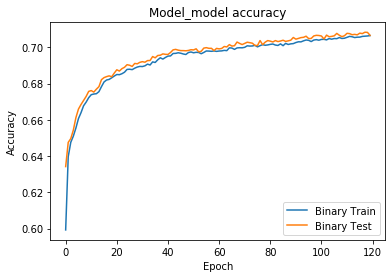

In [21]:
if doPlotMetrics:
    plot_accuracy_Train_vs_Test(nparray_accuracyBinary_Train,nparray_accuracyBinary_Test,nparray_accuracyCategorical_Train,nparray_accuracyCategorical_Test,"model")

In [22]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_graph_loss.png")
# done function

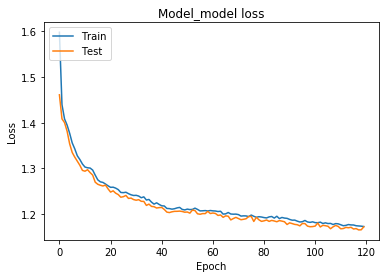

In [23]:
if doPlotMetrics:
    plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,"model")

In [24]:
def predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test):
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    nparray_PredictedOutput_Train=model.predict(nparray_Input_Train)
    p("PredictedOutput_Train",nparray_PredictedOutput_Train)
    p("Output_Train",nparray_Output_Train)
    nparray_Diff_Train=nparray_PredictedOutput_Train-nparray_Output_Train
    p("Diff_Train",nparray_Diff_Train)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Train=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    np.save(outputFileNamePredictedOutput_Train,nparray_PredictedOutput_Train)
    outputFileNameDiff_Train=outputFolder+"/"+outputFileNameStem+"_Diff_Train.npy"
    np.save(outputFileNameDiff_Train,nparray_Diff_Train)
    
    # Test
    nparray_PredictedOutput_Test=model.predict(nparray_Input_Test)
    p("PredictedOutput_Test",nparray_PredictedOutput_Test)
    p("Output_Test",nparray_Output_Test)
    nparray_Diff_Test=nparray_PredictedOutput_Test-nparray_Output_Test
    p("Diff_Test",nparray_Diff_Test)
    # save numpy arrays to npy files
    outputFileNamePredictedOutput_Test=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    np.save(outputFileNamePredictedOutput_Test,nparray_PredictedOutput_Test)
    outputFileNameDiff_Test=outputFolder+"/"+outputFileNameStem+"_Diff_Test.npy"
    np.save(outputFileNameDiff_Test,nparray_Diff_Test)
    
# done function    

In [25]:
if doPredict:
    predict_from_model(model,nparray_Input_Train,nparray_Input_Test,nparray_Output_Train,nparray_Output_Test)

Start PredictedOutput_Train
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 ...
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
End PredictedOutput_Train shape (676641, 20) type <class 'numpy.ndarray'> dtype float32
Start Output_Train
[[-1  1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1  1]]
End Output_Train shape (676641, 20) type <class 'numpy.ndarray'> dtype int64
Start Diff_Train
[[ 0. -2.  0. ...  0.  0.  0.]
 [-2.  2.  0. ...  0.  0.  0.]
 [ 0.  2.  0. ...  0.  0.  0.]
 ...
 [-2.  0. -2. ...  0.  0.  0.]
 [-2.  0. -2. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]]
End Diff_Train shape (676641, 20) type <class 'numpy.ndarray'> dtype float64
Start PredictedOutput_Test
[[-1.  1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1.  1. -1. ... -1. -1. -1.

In [26]:
def load_predicted():
    outputFileNameStem="NN_4_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    
    # Train
    outputFileNamePredictedOutput_Train=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Train.npy"
    nparray_PredictedOutput_Train=np.load(outputFileNamePredictedOutput_Train)
    outputFileNameDiff_Train=outputFolder+"/"+outputFileNameStem+"_Diff_Train.npy"
    nparray_Diff_Train=np.load(outputFileNameDiff_Train)
    
    # Test
    outputFileNamePredictedOutput_Test=outputFolder+"/"+outputFileNameStem+"_PredictedOutput_Test.npy"
    nparray_PredictedOutput_Test=np.load(outputFileNamePredictedOutput_Test)
    outputFileNameDiff_Test=outputFolder+"/"+outputFileNameStem+"_Diff_Test.npy"
    nparray_Diff_Test=np.load(outputFileNameDiff_Test)
    
    return nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test
# done function   

In [27]:
if doLoadPredict:
    nparray_PredictedOutput_Train, nparray_Diff_Train, nparray_PredictedOutput_Test, nparray_Diff_Test=load_predicted()

In [28]:
def calculate_metrics2(TrainOrTest, nparray_Output, nparray_PredictedOutput):
    #p("nparray_Output",nparray_Output)
    #p("nparray_PredictedOutput",nparray_PredictedOutput)
    
    # for loop over i (buckets)
    list_bucket_OutputPositive=[]
    list_bucket_OutputNegative=[]
    list_bucket_PredictedOutputPositive=[]
    list_bucket_PredictedOutputNegative=[]
    list_bucket_TruePositive=[]
    list_bucket_FalsePositive=[]
    list_bucket_FalseNegative=[]
    list_bucket_TrueNegative=[]
    list_bucket_acc=[]
    list_bucket_accuracy=[]
    list_bucket_precision=[]
    list_bucket_recall=[]
    list_bucket_negativePredictedValue=[]
    list_bucket_trueNegativeRate=[]
    
    for i in range(len(nparray_Output)):
        #if i>=1:
            #continue
        #print("bucket i",i)
        nparray_bucket_Output=nparray_Output[i]
        nparray_bucket_PredictedOutput=nparray_PredictedOutput[i]
        #p("nparray_bucket_Output",nparray_bucket_Output)
        #p("nparray_bucket_PredictedOutput",nparray_bucket_PredictedOutput)
        
        # for loop over j (hit)
        counter_hit_TP=0
        counter_hit_FP=0
        counter_hit_FN=0
        counter_hit_TN=0
        for j in range(len(nparray_bucket_Output)):
            #print ("hit j",j)
            hit_Output=nparray_bucket_Output[j]
            hit_PredictedOutput=nparray_bucket_PredictedOutput[j]
            #print("j",j,"hit_PredictedOutput - hit_Output",hit_PredictedOutput, hit_Output)
               
            # confusion matrix
            # TP FP
            # FN TN
            TP=0 # True Positive
            FP=0 # False Positive (type I error)
            FN=0 # False Negative (type II error)
            TN=0 # True Negative
            
            # for this hit ask conditions
            if hit_PredictedOutput>0:
                # the value is predicted positive
                if hit_Output>0:
                    # the value is actually positive
                    TP=1
                else:
                    # the value is actually negative 
                    FP=1
                # done if 
            else:
                # the value is predicted negative
                if hit_Output>0:
                    # the value is actually positive
                    FN=1
                else:
                    # the value is actually negative
                    TN=1
                # done if
            # done if 
            #print("i",i,"j",j,"TP",TP,"FP",FP,"FN",FN,"TN",TN)
            
            # increment counters for hits
            counter_hit_TP+=TP
            counter_hit_FP+=FP
            counter_hit_FN+=FN
            counter_hit_TN+=TN  
        # done for loop over j (hit)
        #print("i",i,"counter_hit_TP",counter_hit_TP,"counter_hit_FP",counter_hit_FP,"counter_hit_FN",counter_hit_FN,"counter_hit_TN",counter_hit_TN)

        
        bucket_OutputPositive=counter_hit_TP+counter_hit_FN 
        bucket_OutputNegative=counter_hit_FP+counter_hit_TN
        bucket_PredictedOutputPositive=counter_hit_TP+counter_hit_FP
        bucket_PredictedOutputNegative=counter_hit_FN+counter_hit_TN
        
        #print("i",i,"bucket_OutputPositive",bucket_OutputPositive)
        #print("i",i,"bucket_OutputNegative",bucket_OutputNegative)
        #print("i",i,"bucket_PredictedOutputPositive",bucket_PredictedOutputPositive)
        #print("i",i,"bucket_PredictedOutputNegative",bucket_PredictedOutputNegative)
        
        
        bucket_TruePositive=counter_hit_TP
        bucket_FalsePositive=counter_hit_FP
        bucket_FalseNegative=counter_hit_FN
        bucket_TrueNegative=counter_hit_TN

        # accuracy=(TP+TN)/(TP+FP+FN+TN)=(TP+TN)/ALL, ALL=20 (20 hits in a bucket)
        # precision=(TP)/(TP+FP)=(TP)/(all that are in reality positive)=efficiency from CERN 
        # e.g. there are 100 truth electrons, efficiency = what fraction of them are also reconstricted as electrons? 
        # recall=(TP)/(TP+FN)=(TP)/(all that are predicted positive) = one minus fake rate from CERN
        # e.g. fake rate = I have reconstructed 100 electrons. What fraction of these are not in reality truth electrons
        # fake rate = What fraction of reconstructed electrons are fake electrons?
        # fake rate = (FN)/(TP+FN) = 1 - recall
        
        # accuracy
        bucket_accuracy=(counter_hit_TP+counter_hit_TN)/(counter_hit_TP+counter_hit_FP+counter_hit_FN+counter_hit_TN)
        bucket_acc=counter_hit_TP+counter_hit_TN
        
        # https://en.wikipedia.org/wiki/Precision_and_recall
        
        # precision
        if (counter_hit_TP+counter_hit_FP)==0:
            bucket_precision=0
        else:
            bucket_precision=(counter_hit_TP)/(counter_hit_TP+counter_hit_FP)
        # done if
        
        # recall
        if counter_hit_TP+counter_hit_FN==0:
            bucket_recall=0
        else:
            bucket_recall=(counter_hit_TP)/(counter_hit_TP+counter_hit_FN)
        # done if
        #print("i",i,"bucket_accuracy",bucket_accuracy,"bucket_precision",bucket_precision,"bucket_recall",bucket_recall)
        
        # Negative predicted values (like precision but for negative)
        if counter_hit_TN+counter_hit_FN==0:
            bucket_negativePredictedValue=0
        else:
            bucket_negativePredictedValue=(counter_hit_TN)/(counter_hit_TN+counter_hit_FN)
        # done if
        
        # True negative rate (like recall, but for negative)
        if counter_hit_TN+counter_hit_FP==0:
            bucket_trueNegativeRate=0
        else:
            bucket_trueNegativeRate=(counter_hit_TN)/(counter_hit_TN+counter_hit_FP)
        # done if 
        
        
        
        # add to lists
        list_bucket_OutputPositive.append(bucket_OutputPositive)
        list_bucket_OutputNegative.append(bucket_OutputNegative)
        list_bucket_PredictedOutputPositive.append(bucket_PredictedOutputPositive)
        list_bucket_PredictedOutputNegative.append(bucket_PredictedOutputNegative)
        list_bucket_TruePositive.append(bucket_TruePositive)
        list_bucket_FalsePositive.append(bucket_FalsePositive)
        list_bucket_FalseNegative.append(bucket_FalseNegative)
        list_bucket_TrueNegative.append(bucket_TrueNegative)
        list_bucket_acc.append(bucket_acc)
        list_bucket_accuracy.append(bucket_accuracy)
        list_bucket_precision.append(bucket_precision)
        list_bucket_recall.append(bucket_recall)
        list_bucket_negativePredictedValue.append(bucket_negativePredictedValue)
        list_bucket_trueNegativeRate.append(bucket_trueNegativeRate)
        
    # done for loop over i (bucket)
    #print("list_bucket_accuracy",list_bucket_accuracy)
    #print("list_bucket_precision",list_bucket_precision)
    #print("list_bucket_recall",list_bucket_recall)
    
    # convert list to numpy array
    nparray_bucket_OutputPositive=np.array(list_bucket_OutputPositive)
    nparray_bucket_OutputNegative=np.array(list_bucket_OutputNegative)
    nparray_bucket_PredictedOutputPositive=np.array(list_bucket_PredictedOutputPositive)
    nparray_bucket_PredictedOutputNegative=np.array(list_bucket_PredictedOutputNegative)
    nparray_bucket_TruePositive=np.array(list_bucket_TruePositive)
    nparray_bucket_FalsePositive=np.array(list_bucket_FalsePositive)
    nparray_bucket_FalseNegative=np.array(list_bucket_FalseNegative)
    nparray_bucket_TrueNegative=np.array(list_bucket_TrueNegative)
    nparray_bucket_acc=np.array(list_bucket_acc)
    nparray_bucket_accuracy=np.array(list_bucket_accuracy)
    nparray_bucket_precision=np.array(list_bucket_precision)
    nparray_bucket_recall=np.array(list_bucket_recall)
    nparray_bucket_negativePredictedValue=np.array(list_bucket_negativePredictedValue)
    nparray_bucket_trueNegativeRate=np.array(list_bucket_trueNegativeRate)
    
    p("nparray_bucket_OutputPositive",nparray_bucket_OutputPositive)
    p("nparray_bucket_OutputNegative",nparray_bucket_OutputNegative)
    p("nparray_bucket_PredictedOutputPositive",nparray_bucket_PredictedOutputPositive)
    p("nparray_bucket_PredictedOutputNegative",nparray_bucket_PredictedOutputNegative)
    p("nparray_bucket_TruePositive",nparray_bucket_TruePositive)
    p("nparray_bucket_FalsePositive",nparray_bucket_FalsePositive)
    p("nparray_bucket_FalseNegative",nparray_bucket_FalseNegative)
    p("nparray_bucket_TrueNegative",nparray_bucket_TrueNegative)
    p("nparray_bucket_acc",nparray_bucket_acc)
    p("nparray_bucket_accuracy",nparray_bucket_accuracy)
    p("nparray_bucket_precision",nparray_bucket_precision)
    p("nparray_bucket_recall",nparray_bucket_recall)
    p("nparray_bucket_negativePredictedValue",nparray_bucket_negativePredictedValue)
    p("nparray_bucket_trueNegativeRate",nparray_bucket_trueNegativeRate)
    
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    

    outputFileName_OutputPositive=outputFolder+"/"+outputFileNameStem+"_OutputPositive_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputPositive,nparray_bucket_OutputPositive)
    outputFileName_OutputNegative=outputFolder+"/"+outputFileNameStem+"_OutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputNegative,nparray_bucket_OutputNegative)
    outputFileName_OutputNegative=outputFolder+"/"+outputFileNameStem+"_OutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_OutputNegative,nparray_bucket_OutputNegative)
    outputFileName_PredictedOutputPositive=outputFolder+"/"+outputFileNameStem+"_PredictedOutputPositive_"+TrainOrTest+".npy"
    np.save(outputFileName_PredictedOutputPositive,nparray_bucket_PredictedOutputPositive)
    outputFileName_PredictedOutputNegative=outputFolder+"/"+outputFileNameStem+"_PredictedOutputNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_PredictedOutputNegative,nparray_bucket_PredictedOutputNegative)
    outputFileName_TruePositive=outputFolder+"/"+outputFileNameStem+"_TruePositive_"+TrainOrTest+".npy"
    np.save(outputFileName_TruePositive,nparray_bucket_TruePositive)
    outputFileName_FalsePositive=outputFolder+"/"+outputFileNameStem+"_FalsePositive_"+TrainOrTest+".npy"
    np.save(outputFileName_FalsePositive,nparray_bucket_FalsePositive)
    outputFileName_FalseNegative=outputFolder+"/"+outputFileNameStem+"_FalseNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_FalseNegative,nparray_bucket_FalseNegative)
    outputFileName_TrueNegative=outputFolder+"/"+outputFileNameStem+"_TrueNegative_"+TrainOrTest+".npy"
    np.save(outputFileName_TrueNegative,nparray_bucket_TrueNegative)
    outputFileName_acc=outputFolder+"/"+outputFileNameStem+"_accuracy_"+TrainOrTest+".npy"
    np.save(outputFileName_acc,nparray_bucket_acc)
    outputFileName_accuracy=outputFolder+"/"+outputFileNameStem+"_accuracy_"+TrainOrTest+".npy"
    np.save(outputFileName_accuracy,nparray_bucket_accuracy)
    outputFileName_precision=outputFolder+"/"+outputFileNameStem+"_precision_"+TrainOrTest+".npy"
    np.save(outputFileName_precision,nparray_bucket_precision)
    outputFileName_recall=outputFolder+"/"+outputFileNameStem+"_recall_"+TrainOrTest+".npy"
    np.save(outputFileName_recall,nparray_bucket_recall)
    outputFileName_negativePredictedValue=outputFolder+"/"+outputFileNameStem+"_negativePredictedValue_"+TrainOrTest+".npy"
    np.save(outputFileName_negativePredictedValue,nparray_bucket_negativePredictedValue)
    outputFileName_trueNegativeRate=outputFolder+"/"+outputFileNameStem+"_trueNegativeRate_"+TrainOrTest+".npy"
    np.save(outputFileName_trueNegativeRate,nparray_bucket_trueNegativeRate)
    
    
    
    
    
    
    
    
    # done all, ready to return
    return nparray_bucket_OutputPositive,nparray_bucket_OutputNegative,nparray_bucket_PredictedOutputPositive,nparray_bucket_PredictedOutputNegative,nparray_bucket_TruePositive,nparray_bucket_FalsePositive,nparray_bucket_FalseNegative,nparray_bucket_TrueNegative,nparray_bucket_acc,nparray_bucket_accuracy,nparray_bucket_precision,nparray_bucket_recall,nparray_bucket_negativePredictedValue,nparray_bucket_trueNegativeRate
# done function

In [29]:
if doCalculateMetrics2:
    print("")
    print("Train")
    nparray_bucket_OutputPositive_Train,nparray_bucket_OutputNegative_Train,nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_TruePositive_Train,nparray_bucket_FalsePositive_Train,nparray_bucket_FalseNegative_Train,nparray_bucket_TrueNegative_Train,nparray_bucket_acc_Train,nparray_bucket_accuracy_Train,nparray_bucket_precision_Train,nparray_bucket_recall_Train,nparray_bucket_negativePredictedValue_Train,nparray_bucket_trueNegativeRate_Train=calculate_metrics2("Train", nparray_Output_Train, nparray_PredictedOutput_Train)
    print("")
    print("Test")
    nparray_bucket_OutputPositive_Test,nparray_bucket_OutputNegative_Test,nparray_bucket_PredictedOutputPositive_Test,nparray_bucket_PredictedOutputNegative_Test,nparray_bucket_TruePositive_Test,nparray_bucket_FalsePositive_Test,nparray_bucket_FalseNegative_Test,nparray_bucket_TrueNegative_Test,nparray_bucket_acc_Test,nparray_bucket_accuracy_Test,nparray_bucket_precision_Test,nparray_bucket_recall_Test,nparray_bucket_negativePredictedValue_Test,nparray_bucket_trueNegativeRate_Test=calculate_metrics2("Test", nparray_Output_Test, nparray_PredictedOutput_Test)


Train
Start nparray_bucket_OutputPositive
[ 7  6  6 ... 12 14 12]
End nparray_bucket_OutputPositive shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_OutputNegative
[13 14 14 ...  8  6  8]
End nparray_bucket_OutputNegative shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_PredictedOutputPositive
[8 8 9 ... 9 9 4]
End nparray_bucket_PredictedOutputPositive shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_PredictedOutputNegative
[12 12 11 ... 11 11 16]
End nparray_bucket_PredictedOutputNegative shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_TruePositive
[3 4 4 ... 9 9 2]
End nparray_bucket_TruePositive shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_FalsePositive
[5 4 5 ... 0 0 2]
End nparray_bucket_FalsePositive shape (676641,) type <class 'numpy.ndarray'> dtype int64
Start nparray_bucket_FalseNegative
[ 4  2  2 ...  3  5 10]
End nparray_buck

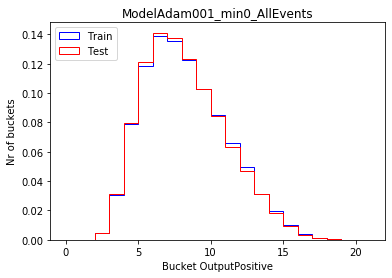

In [30]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName):
    plt.hist(nparray_bucket_OutputPositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_OutputPositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputPositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_OutputPositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_OutputPositive(nparray_bucket_OutputPositive_Train,nparray_bucket_OutputPositive_Test,modelName)

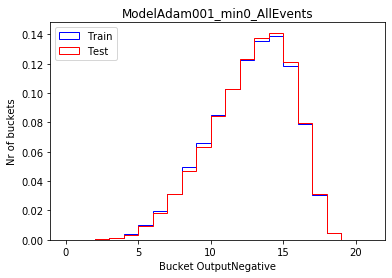

In [31]:
# overlay train and test we expect train to be better than test 
def plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName):
    plt.hist(nparray_bucket_OutputNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_OutputNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket OutputNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_OutputNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_OutputNegative(nparray_bucket_OutputNegative_Train,nparray_bucket_OutputNegative_Test,modelName)

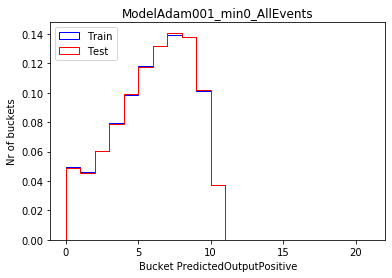

In [32]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName):
    plt.hist(nparray_bucket_PredictedOutputPositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_PredictedOutputPositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputPositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_PredictedOutputPositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputPositive(nparray_bucket_PredictedOutputPositive_Train,nparray_bucket_PredictedOutputPositive_Test,modelName)

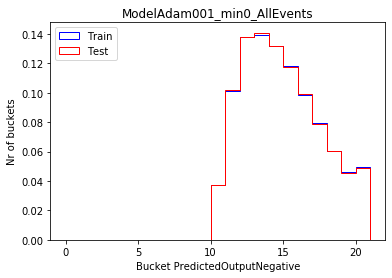

In [33]:
# overlay train and test we expect train to be better than test 
def plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName):
    #p("nparray_bucket_PredictedOutputNegative_Train",nparray_bucket_PredictedOutputNegative_Train)
    #p("nparray_bucket_PredictedOutputNegative_Test",nparray_bucket_PredictedOutputNegative_Test)
    plt.hist(nparray_bucket_PredictedOutputNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_PredictedOutputNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket PredictedOutputNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_PredictedOutputNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_PredictedOutputNegative(nparray_bucket_PredictedOutputNegative_Train,nparray_bucket_PredictedOutputNegative_Test,modelName)

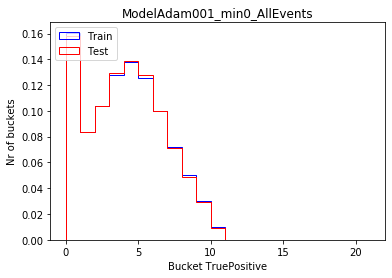

In [34]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName):
    plt.hist(nparray_bucket_TruePositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_TruePositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TruePositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_TruePositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_TruePositive(nparray_bucket_TruePositive_Train,nparray_bucket_TruePositive_Test,modelName)

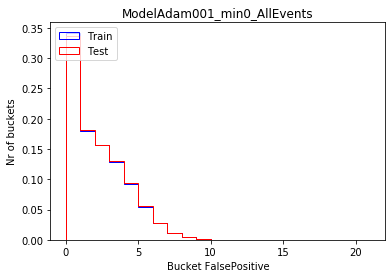

In [35]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName):
    plt.hist(nparray_bucket_FalsePositive_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_FalsePositive_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalsePositive')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_FalsePositive.png")
# done function
if doPlotMetrics2:
    plot_train_test_FalsePositive(nparray_bucket_FalsePositive_Train,nparray_bucket_FalsePositive_Test,modelName)

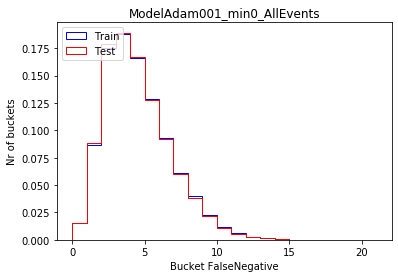

In [36]:
# overlay train and test we expect train to be better than test 
def plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName):
    plt.hist(nparray_bucket_FalseNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_FalseNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket FalseNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_FalseNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_FalseNegative(nparray_bucket_FalseNegative_Train,nparray_bucket_FalseNegative_Test,modelName)

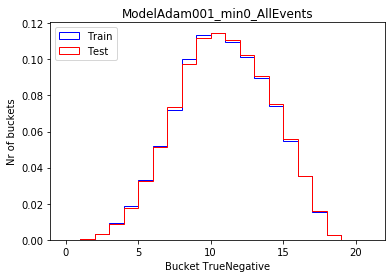

In [37]:
# overlay train and test we expect train to be better than test 
def plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName):
    plt.hist(nparray_bucket_TrueNegative_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_TrueNegative_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket TrueNegative')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_TrueNegative.png")
# done function
if doPlotMetrics2:
    plot_train_test_TrueNegative(nparray_bucket_TrueNegative_Train,nparray_bucket_TrueNegative_Test,modelName)

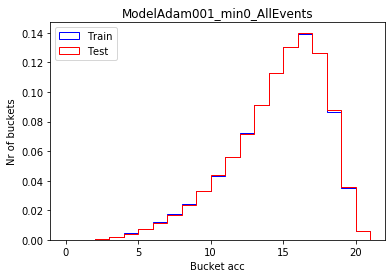

In [38]:
# overlay train and test we expect train to be better than test 
def plot_train_test_acc(nparray_bucket_acc_Train,nparray_bucket_acc_Test,modelName):
    plt.hist(nparray_bucket_acc_Train,bins=[i for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_acc_Test,bins=[i for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket acc')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_acc.png")
# done function
if doPlotMetrics2:
    plot_train_test_acc(nparray_bucket_acc_Train,nparray_bucket_acc_Test,modelName)

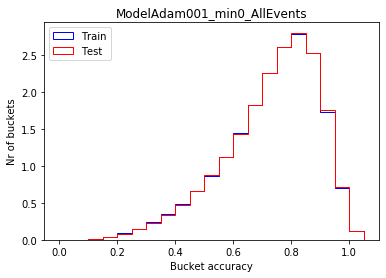

In [39]:
# overlay train and test we expect train to be better than test 
def plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName):
    plt.hist(nparray_bucket_accuracy_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_accuracy_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket accuracy')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_accuracy.png")
# done function
if doPlotMetrics2:
    plot_train_test_accuracy(nparray_bucket_accuracy_Train,nparray_bucket_accuracy_Test,modelName)

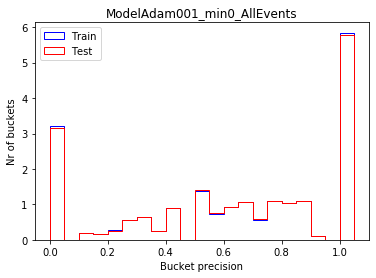

In [40]:
# overlay train and test we expect train to be better than test 
def plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName):
    plt.hist(nparray_bucket_precision_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_precision_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket precision')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_precision.png")
# done function
if doPlotMetrics2:
    plot_train_test_precision(nparray_bucket_precision_Train,nparray_bucket_precision_Test,modelName)

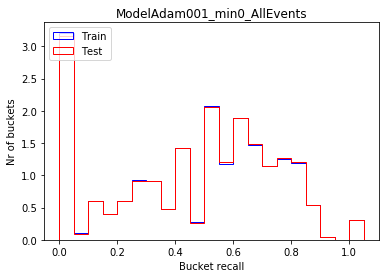

In [41]:
# overlay train and test we expect train to be better than test 
def plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName):
    plt.hist(nparray_bucket_recall_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_recall_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket recall')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_recall.png")
# done function
if doPlotMetrics2:
    plot_train_test_recall(nparray_bucket_recall_Train,nparray_bucket_recall_Test,modelName)

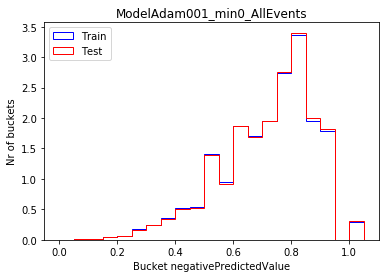

In [42]:
# overlay train and test we expect train to be better than test 
def plot_train_test_negativePredictedValue(nparray_bucket_negativePredictedValue_Train,nparray_bucket_negativePredictedValue_Test,modelName):
    plt.hist(nparray_bucket_negativePredictedValue_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_negativePredictedValue_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket negativePredictedValue')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_negativePredictedValue.png")
# done function
if doPlotMetrics2:
    plot_train_test_negativePredictedValue(nparray_bucket_negativePredictedValue_Train,nparray_bucket_negativePredictedValue_Test,modelName)

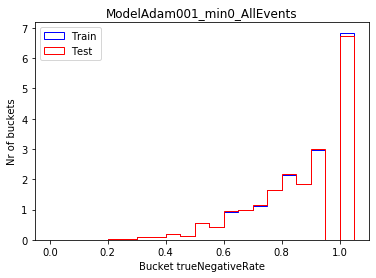

In [43]:
# overlay train and test we expect train to be better than test 
def plot_train_test_trueNegativeRate(nparray_bucket_trueNegativeRate_Train,nparray_bucket_trueNegativeRate_Test,modelName):
    plt.hist(nparray_bucket_trueNegativeRate_Train,bins=[i/20 for i in range(22)],density=True,alpha=1,color="blue",histtype='step')
    plt.hist(nparray_bucket_trueNegativeRate_Test,bins=[i/20 for i in range(22)],density=True,alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Bucket trueNegativeRate')
    plt.title(modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    #plt.show()
    outputFileNameStem="NN_5_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    plt.savefig(outputFolder+"/"+outputFileNameStem+"_histo_trueNegativeRate.png")
# done function
if doPlotMetrics2:
    plot_train_test_trueNegativeRate(nparray_bucket_trueNegativeRate_Train,nparray_bucket_trueNegativeRate_Test,modelName)
    

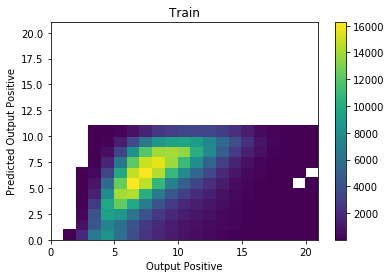

In [44]:
fig, ax = plt.subplots()
h=ax.hist2d(
    nparray_bucket_OutputPositive_Train,
    nparray_bucket_PredictedOutputPositive_Train,
    bins=[range(0,22),range(0,22)],
    cmin=1
    )
plt.colorbar(h[3], ax=ax)
plt.xlabel("Output Positive")
plt.ylabel("Predicted Output Positive")
plt.title("Train")


plt.savefig(outputFolder+"/histo_OutputPositive_vs_PredictedOutputPositive_Train.pdf")
plt.savefig(outputFolder+"/histo_OutputPositive_vs_PredictedOutputPositive_Train.png")


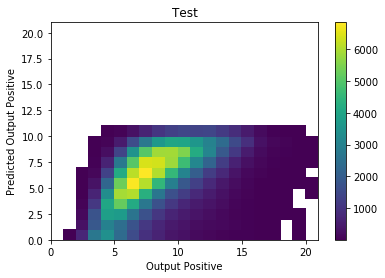

In [45]:
fig, ax = plt.subplots()
h=ax.hist2d(
    nparray_bucket_OutputPositive_Test,
    nparray_bucket_PredictedOutputPositive_Test,
    bins=[range(0,22),range(0,22)],
    cmin=1
    )
plt.colorbar(h[3], ax=ax)
plt.xlabel("Output Positive")
plt.ylabel("Predicted Output Positive")
plt.title("Test")


plt.savefig(outputFolder+"/histo_OutputPositive_vs_PredictedOutputPositive_Test.pdf")
plt.savefig(outputFolder+"/histo_OutputPositive_vs_PredictedOutputPositive_Test.png")

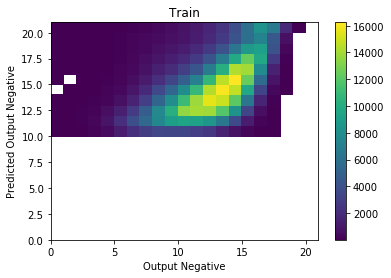

In [46]:
fig, ax = plt.subplots()
h=ax.hist2d(
    nparray_bucket_OutputNegative_Train,
    nparray_bucket_PredictedOutputNegative_Train,
    bins=[range(0,22),range(0,22)],
    cmin=1,
    # norm=LogNorm()
    )
plt.colorbar(h[3], ax=ax)

plt.xlabel("Output Negative")
plt.ylabel("Predicted Output Negative")
plt.title("Train")


plt.savefig(outputFolder+"/histo_OutputNegative_vs_PredictedOutputNegative_Train.pdf")
plt.savefig(outputFolder+"/histo_OutputNegative_vs_PredictedOutputNegative_Train.png")

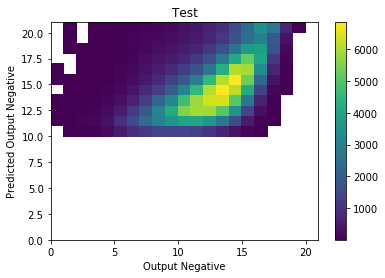

In [47]:
fig, ax = plt.subplots()
h=ax.hist2d(
    nparray_bucket_OutputNegative_Test,
    nparray_bucket_PredictedOutputNegative_Test,
    bins=[range(0,22),range(0,22)],
    cmin=1
    )
plt.xlabel("Output Negative")
plt.ylabel("Predicted Output Negative")
plt.title("Test")
plt.colorbar(h[3], ax=ax)



plt.savefig(outputFolder+"/histo_OutputNegative_vs_PredictedOutputNegative_Test.pdf")
plt.savefig(outputFolder+"/histo_OutputNegative_vs_PredictedOutputNegative_Test.png")

In [48]:
# Confusion matrix Train
nbHitTP=np.sum(nparray_bucket_TruePositive_Train)
nbHitFP=np.sum(nparray_bucket_FalsePositive_Train)
nbHitFN=np.sum(nparray_bucket_FalseNegative_Train)
nbHitTN=np.sum(nparray_bucket_TrueNegative_Train)
nrHitsAll=nbHitTP+nbHitFP+nbHitFN+nbHitTN
nrHitsPercentTP=100*nbHitTP/nrHitsAll
nrHitsPercentFP=100*nbHitFP/nrHitsAll
nrHitsPercentFN=100*nbHitFN/nrHitsAll
nrHitsPercentTN=100*nbHitTN/nrHitsAll
print("TrainnbHits Percent TP=%.1f FP=%.1f FN=%.1f TN=%.1f"%(nrHitsPercentTP,nrHitsPercentFP,nrHitsPercentFN,nrHitsPercentTN))

TrainnbHits Percent TP=18.6 FP=9.1 FN=20.4 TN=51.9


In [49]:
# Confusion matrix Train
nbHitTP=np.sum(nparray_bucket_TruePositive_Test)
nbHitFP=np.sum(nparray_bucket_FalsePositive_Test)
nbHitFN=np.sum(nparray_bucket_FalseNegative_Test)
nbHitTN=np.sum(nparray_bucket_TrueNegative_Test)
nrHitsAll=nbHitTP+nbHitFP+nbHitFN+nbHitTN
nrHitsPercentTP=100*nbHitTP/nrHitsAll
nrHitsPercentFP=100*nbHitFP/nrHitsAll
nrHitsPercentFN=100*nbHitFN/nrHitsAll
nrHitsPercentTN=100*nbHitTN/nrHitsAll
print("TestbHits Percent TP=%.1f FP=%.1f FN=%.1f TN=%.1f"%(nrHitsPercentTP,nrHitsPercentFP,nrHitsPercentFN,nrHitsPercentTN))

TestbHits Percent TP=18.6 FP=9.2 FN=20.1 TN=52.1
